In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## PREPARE DATA

In [2]:
import glob
import os

folder_name = 'dataset'
file_type = 'csv'
seperator =','
df = pd.concat([pd.read_csv(f, sep=seperator) for f in glob.glob(folder_name + "/*."+file_type)], ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665968,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [5]:
print('The dataset has', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset has 5667717 rows and 13 columns.


## PROCESS DATA

In [6]:
# Check the data for duplicates
print('Shape before dropping duplicates', df.shape)
df = df.drop_duplicates()
print('Shape after dropping duplicates', df.shape)

Shape before dropping duplicates (5667717, 13)
Shape after dropping duplicates (5667717, 13)


=> The data has no duplicates

In [7]:
# Check the data for missing values
print(np.sum(df.isnull()), '\n')

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64 



=> There are lots of missing values at 6 columns named: **start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng**

In [8]:
# Convert string to datetime
df['ended_at'] = df['ended_at'].astype('datetime64[ns]')
df['started_at'] = df['started_at'].astype('datetime64[ns]')

# Create a column called “ride_length”
# Calculate the length of each ride by subtracting the column “started_at” from the column “ended_at”
df['ride_length'] = df['ended_at'] - df['started_at']

In [9]:
# Create a column called “day_of_week”
# Calculate the day of the week that each ride started
df['day_of_week'] = df['started_at'].dt.dayofweek

In [10]:
# Create a column called “day_name_of_week”
df['day_name_of_week']= df['started_at'].dt.day_name()

In [11]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,day_name_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,00:02:57,3,Thursday
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665968,42.012560,-87.674367,casual,00:04:21,0,Monday
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,00:04:21,1,Tuesday
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,00:14:56,1,Tuesday
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,00:06:02,3,Thursday


# ANALYZE

In [12]:
# Check 'ride_length'
df['ride_length'].describe()

count                   5667717
mean     0 days 00:19:26.597144
std      0 days 02:56:07.687857
min           -8 days +19:26:39
25%             0 days 00:05:49
50%             0 days 00:10:17
75%             0 days 00:18:28
max            28 days 17:47:15
Name: ride_length, dtype: object

In [13]:
print('Max of ride_length:', max(df['ride_length']))
print('Min of ride_length:', min(df['ride_length']))
print('Mean of ride_length:', df['ride_length'].mean())
print('Mode of ride_length:', df['ride_length'].mode())
print('Median of ride_length:', df['ride_length'].median())

Max of ride_length: 28 days 17:47:15
Min of ride_length: -8 days +19:26:39
Mean of ride_length: 0 days 00:19:26.597144
Mode of ride_length: 0   00:05:23
dtype: timedelta64[ns]
Median of ride_length: 0 days 00:10:17


In [14]:
ride_length_range = df['ride_length'].max() - df['ride_length'].min()
ride_length_range

Timedelta('35 days 22:20:36')

In [23]:
df['ride_length'] = df['ride_length'].astype('int64')

In [35]:
# Check the number of member and casual
df['member_casual'].value_counts()

member    3345685
casual    2322032
Name: member_casual, dtype: int64

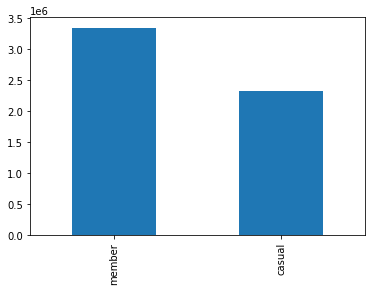

In [37]:
df['member_casual'].value_counts().plot.bar();

=> member users are much more than casual users in 2022

In [27]:
df.groupby('member_casual').ride_length.mean()

member_casual
casual    1.748658e+12
member    7.626251e+11
Name: ride_length, dtype: float64

In [32]:
# Check the number of day name of week
df['day_name_of_week'].value_counts()

Saturday     916471
Thursday     841591
Friday       801787
Wednesday    798223
Tuesday      782372
Sunday       776259
Monday       751014
Name: day_name_of_week, dtype: int64

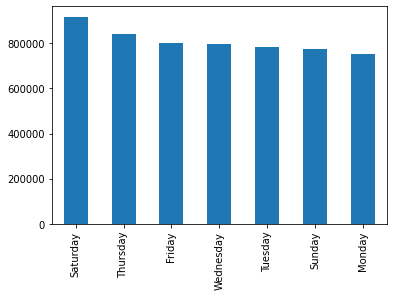

In [34]:
df['day_name_of_week'].value_counts().plot.bar();

=> Users tend to ride on Saturday more than other days of week in 2022

In [38]:
# Contingency table
table = pd.crosstab(df['member_casual'], df['day_name_of_week'])
table

day_name_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,,,,,,,
casual,334701,277675,473190,389036,309330,263746,274354
member,467086,473339,443281,387223,532261,518626,523869


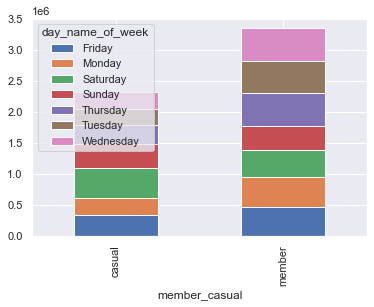

In [41]:
# Stacked Column Chart
table.plot(kind='bar', stacked=True);

In [42]:
# Check the relationship between member_casual and day_name_of_week
# Chi-square Test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(table)
print('Statistic: ', stat)
print('p-value: ', p)
print('dof:', dof)

Statistic:  112691.09112285914
p-value:  0.0
dof: 6


In [43]:
prob = 0.95
alpha = 1 - prob
if p <= alpha:
    print('Reject H0 -> Dependent')
else:
    print('Fail to reject H0 -> Independent')

Reject H0 -> Dependent


=> member_casual and day_name_of_week are dependent variables

In [45]:
df.groupby(['member_casual', 'day_name_of_week']).ride_length.mean()

member_casual  day_name_of_week
casual         Friday              1.682639e+12
               Monday              1.751216e+12
               Saturday            1.956823e+12
               Sunday              2.043207e+12
               Thursday            1.532859e+12
               Tuesday             1.549105e+12
               Wednesday           1.485051e+12
member         Friday              7.518412e+11
               Monday              7.361996e+11
               Saturday            8.483884e+11
               Sunday              8.417481e+11
               Thursday            7.375357e+11
               Tuesday             7.277246e+11
               Wednesday           7.251048e+11
Name: ride_length, dtype: float64

In [46]:
df.groupby(['member_casual', 'day_name_of_week']).ride_id.count()

member_casual  day_name_of_week
casual         Friday              334701
               Monday              277675
               Saturday            473190
               Sunday              389036
               Thursday            309330
               Tuesday             263746
               Wednesday           274354
member         Friday              467086
               Monday              473339
               Saturday            443281
               Sunday              387223
               Thursday            532261
               Tuesday             518626
               Wednesday           523869
Name: ride_id, dtype: int64

In [50]:
# Create pivot table
df_pivot_1 = pd.pivot_table(df, values='ride_id', index='member_casual', columns='day_name_of_week',
                          aggfunc='count')
df_pivot_1

day_name_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,,,,,,,
casual,334701,277675,473190,389036,309330,263746,274354
member,467086,473339,443281,387223,532261,518626,523869


In [51]:
df_pivot_2 = pd.pivot_table(df, values='ride_length', index='member_casual', columns='day_name_of_week',
                          aggfunc='mean')
df_pivot_2

day_name_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,,,,,,,
casual,1.682639e+12,1.751216e+12,1.956823e+12,2.043207e+12,1.532859e+12,1.549105e+12,1.485051e+12
member,7.518412e+11,7.361996e+11,8.483884e+11,8.417481e+11,7.375357e+11,7.277246e+11,7.251048e+11


In [52]:
# Save clean data as a csv file
df.to_csv('clean_data.csv')

## SUMMARY OF ANALYSIS

- How should you organize your data to perform analysis on it?
- Has your data been properly formatted?
- What surprises did you discover in the data?
- What trends or relationships did you find in the data?
- How will these insights help answer your business questions?